# Time Series 

In [8]:
import pandas as pd
import numpy as np

import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv("data/data/data_for_renges.csv")

df.index = df['Unnamed: 0'].values

In [11]:
df.head()

,Unnamed: 0,coffee price,COL CPI,IDN CPI,IND CPI,USA CPI,BRA Flood_left,BRA Landslide_left,BRA Epidemic_left,BRA Extreme temperature _left,...,VNM Landslide_right,VNM Epidemic_right,VNM Extreme temperature _right,VNM Storm_right,VNM Drought_right,VNM Earthquake_right,VNM Insect infestation_right,VNM Wildfire_right,VNM Mass movement (dry)_right,VNM Volcanic activity_right
1973-09,1973-09,0.652700,22.72727,44.00000,19.25078,7.363420,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1973-10,1973-10,0.659552,22.72727,42.30769,21.55440,7.801418,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1973-11,1973-11,0.646810,27.27273,30.63584,23.29897,8.254717,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1973-12,1973-12,0.670937,27.27273,27.17391,23.81443,8.705882,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1974-01,1974-01,0.716991,26.08696,42.54144,25.67010,9.389671,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
model = pf.ARIMA(data=df, ar=4, ma=4, target='coffee price', family=pf.Normal())
x = model.fit("MLE")
x.summary()

Normal ARIMA(4,0,4)                                                                                       
======================================================= ==================================================
Dependent Variable: coffee price                        Method: MLE                                       
Start Date: 1974-01                                     Log Likelihood: 416.7677                          
End Date: 2018-11                                       AIC: -813.5355                                    
Number of observations: 539                             BIC: -770.6383                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.0438     0.0158     2.7721   0.0056   (0.0128 | 0.0748)        
AR(1)                                

Ploting fit

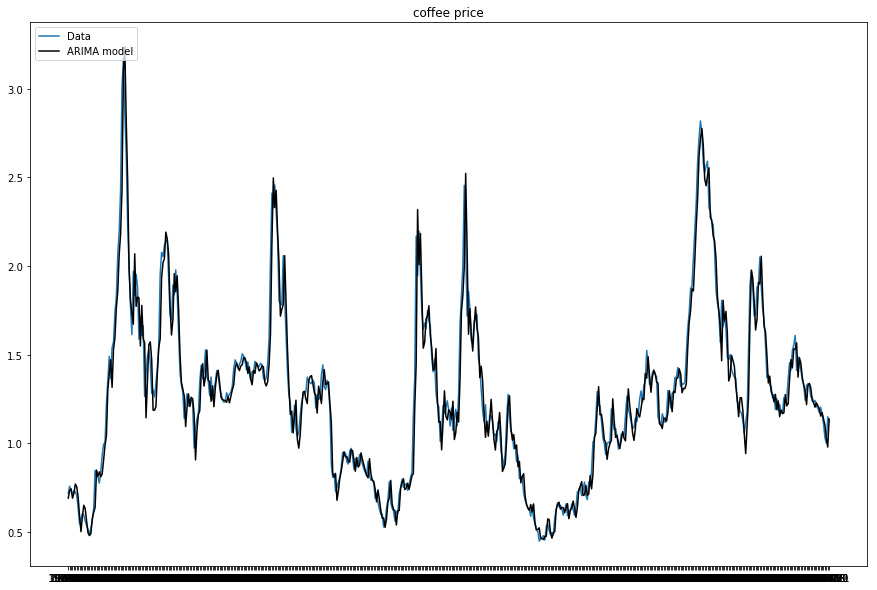

In [14]:
model.plot_fit(figsize=(15,10))

We can plot the latent variables zMLE

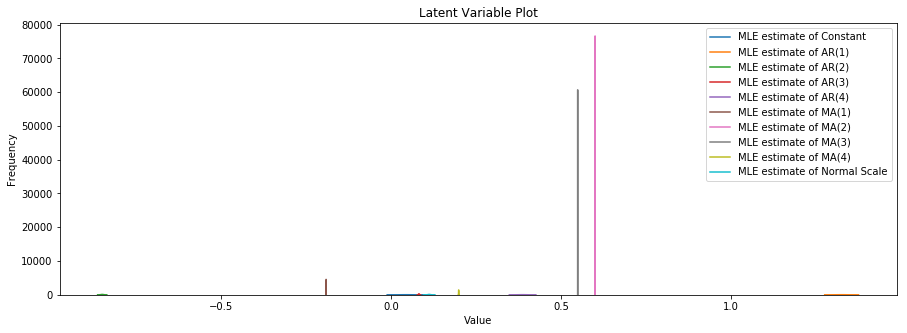

In [16]:
model.plot_z(figsize=(15,5))

We can get an idea of the performance of our model by using rolling in-sample prediction 

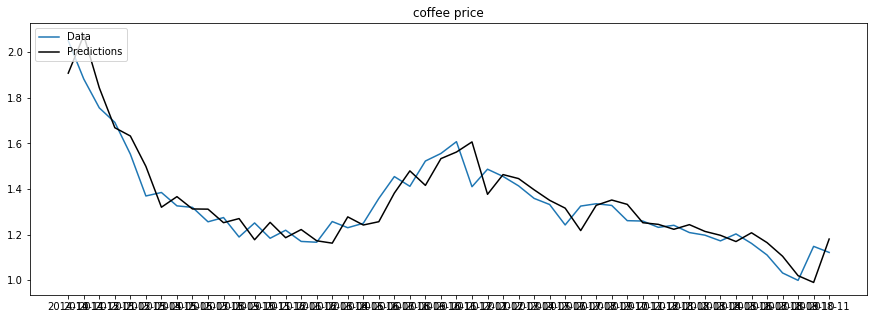

In [17]:
model.plot_predict_is(h=50, figsize=(15,5))

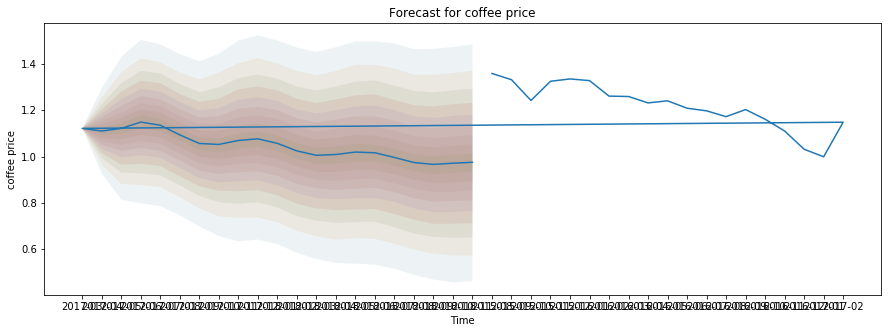

In [15]:
model.plot_predict(h=20,past_values=20,figsize=(15,5))